# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

   order_id  shop_id  user_id  order_value  total_items payment_method  \
0         1       53      746          224            2           cash   
1         2       92      925           90            1           cash   
2         3       44      861          144            1           cash   
3         4       18      935          156            1    credit_card   
4         5       18      883          156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11  
count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_value, dtype: float64


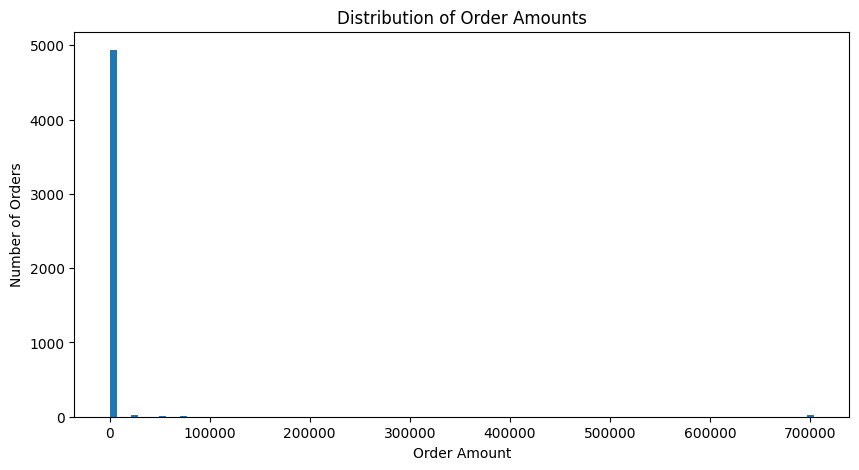

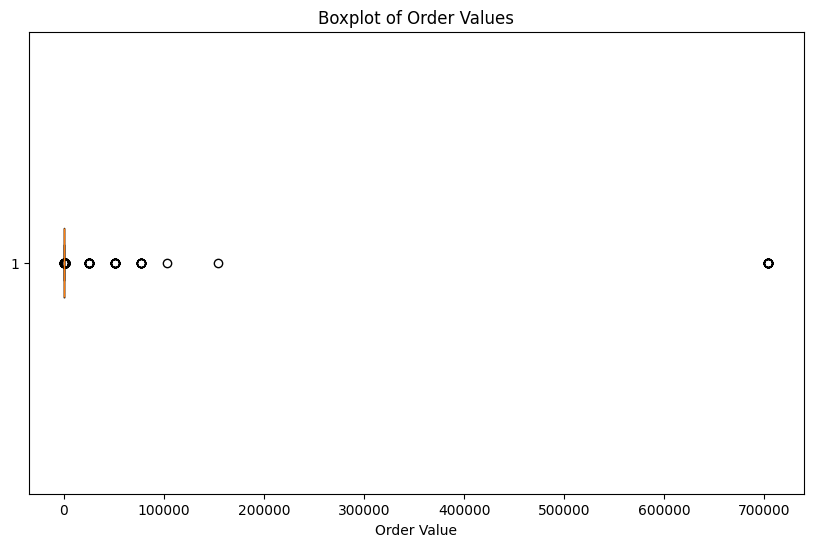

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('orders.csv')

# Take a look at the first few rows of the dataframe
print(df.head())

# Display the column names of the DataFrame


# Descriptive statistics for the order_amount column
print(df['order_value'].describe())

# Plotting the distribution of order values to visually inspect any anomalies
plt.figure(figsize=(10, 5))
plt.hist(df['order_value'], bins=100)
plt.xlabel('Order Amount')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Amounts')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df['order_value'], vert=False)
plt.xlabel('Order Value')
plt.title('Boxplot of Order Values')
plt.show()


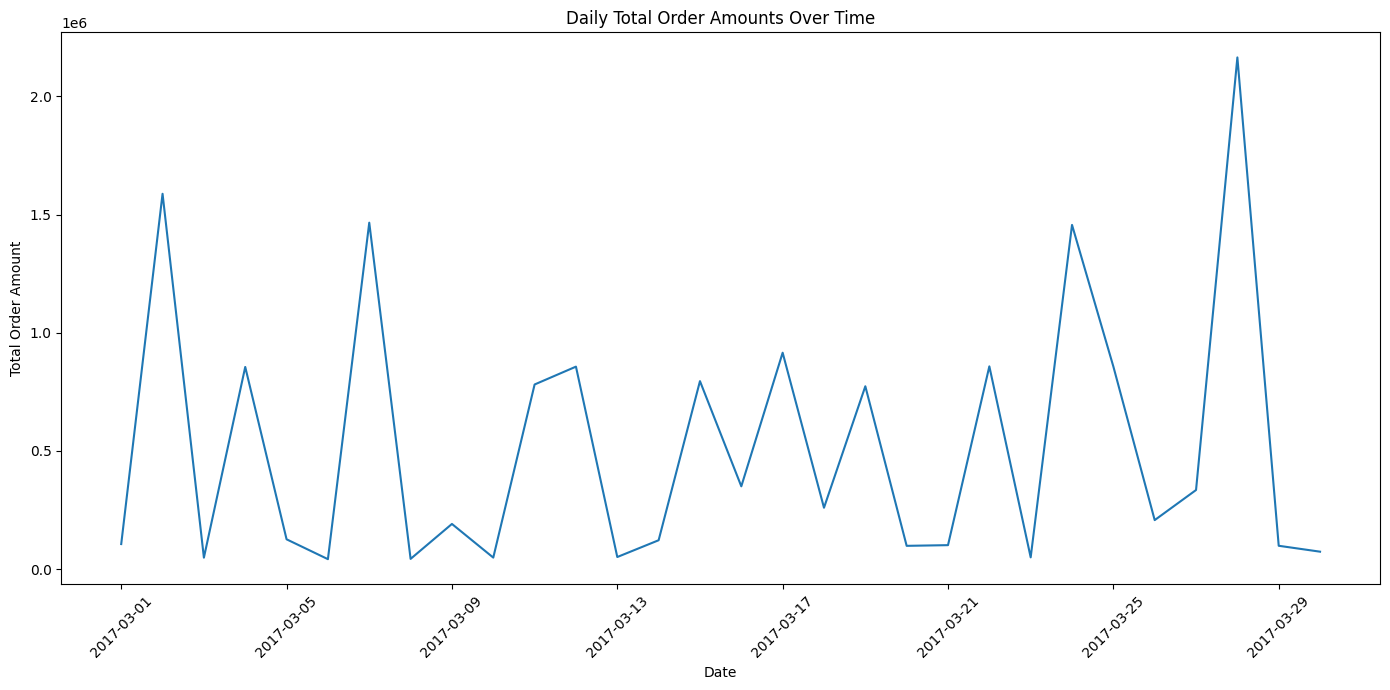

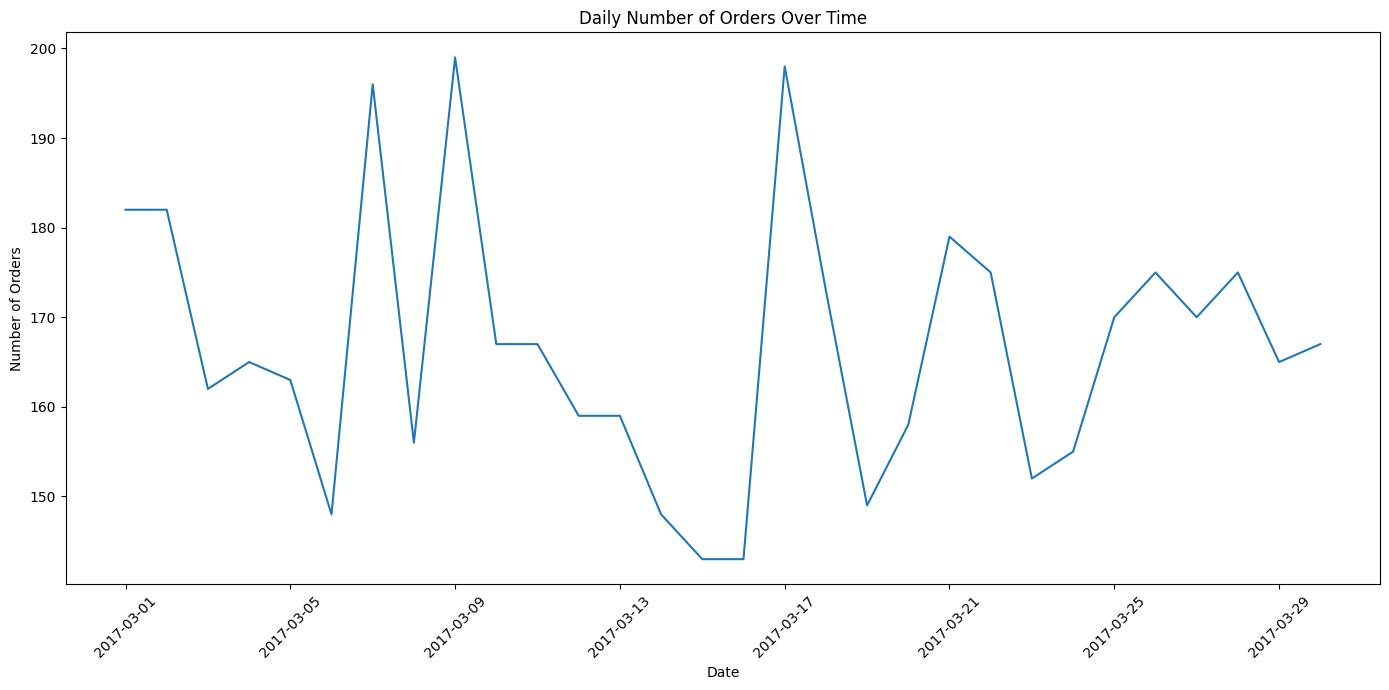

In [12]:
# Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Plotting order amounts over time
plt.figure(figsize=(14, 7))
plt.plot(df.groupby(df['created_at'].dt.date)['order_value'].sum())
plt.xlabel('Date')
plt.ylabel('Total Order Amount')
plt.title('Daily Total Order Amounts Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting number of orders over time
plt.figure(figsize=(14, 7))
plt.plot(df.groupby(df['created_at'].dt.date)['order_value'].size())
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Daily Number of Orders Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>Summary<h2>


"What went wrong with the AOV metric and the analysis:
The AOV was calculated as the mean of the order_value column, which can be heavily influenced by outliers. These outliers can skew the AOV to a point where it does not accurately represent the typical order value. To understand what went wrong, we need to inspect the distribution of the order_value to identify outliers that may be affecting the AOV.

Proposing a new metric:
A more representative metric would be the median order value, as it is not affected by outliers. Alternatively, we could use the average order value after removing outliers, or calculate the average item value by dividing the order value by the number of items in the order. These metrics are less sensitive to extreme values and provide a better representation of a typical order.

Trends in customer purchasing behavior:
By analyzing the created_at column, we can observe patterns over time, such as whether certain days have higher sales volumes, which could indicate peak shopping times or the impact of promotions."